# Importing Libararies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Loading Data

In [4]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x=data.iloc[:,2:4].values
y=data.iloc[:,4].values

# Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Build Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',bootstrap=True,random_state=0)

In [29]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
y_pred=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

In [31]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [32]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Evaluate Model Peformance

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(0.875, 0.990625)

In [34]:
confusion_matrix(y_test,y_pred)

array([[44,  8],
       [ 2, 26]], dtype=int64)

In [35]:
confusion_matrix(y_train,y_pred_train)

array([[205,   0],
       [  3, 112]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        52
           1       0.76      0.93      0.84        28

    accuracy                           0.88        80
   macro avg       0.86      0.89      0.87        80
weighted avg       0.89      0.88      0.88        80



In [37]:
from sklearn.tree import plot_tree

In [38]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=441365315),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=192771779),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

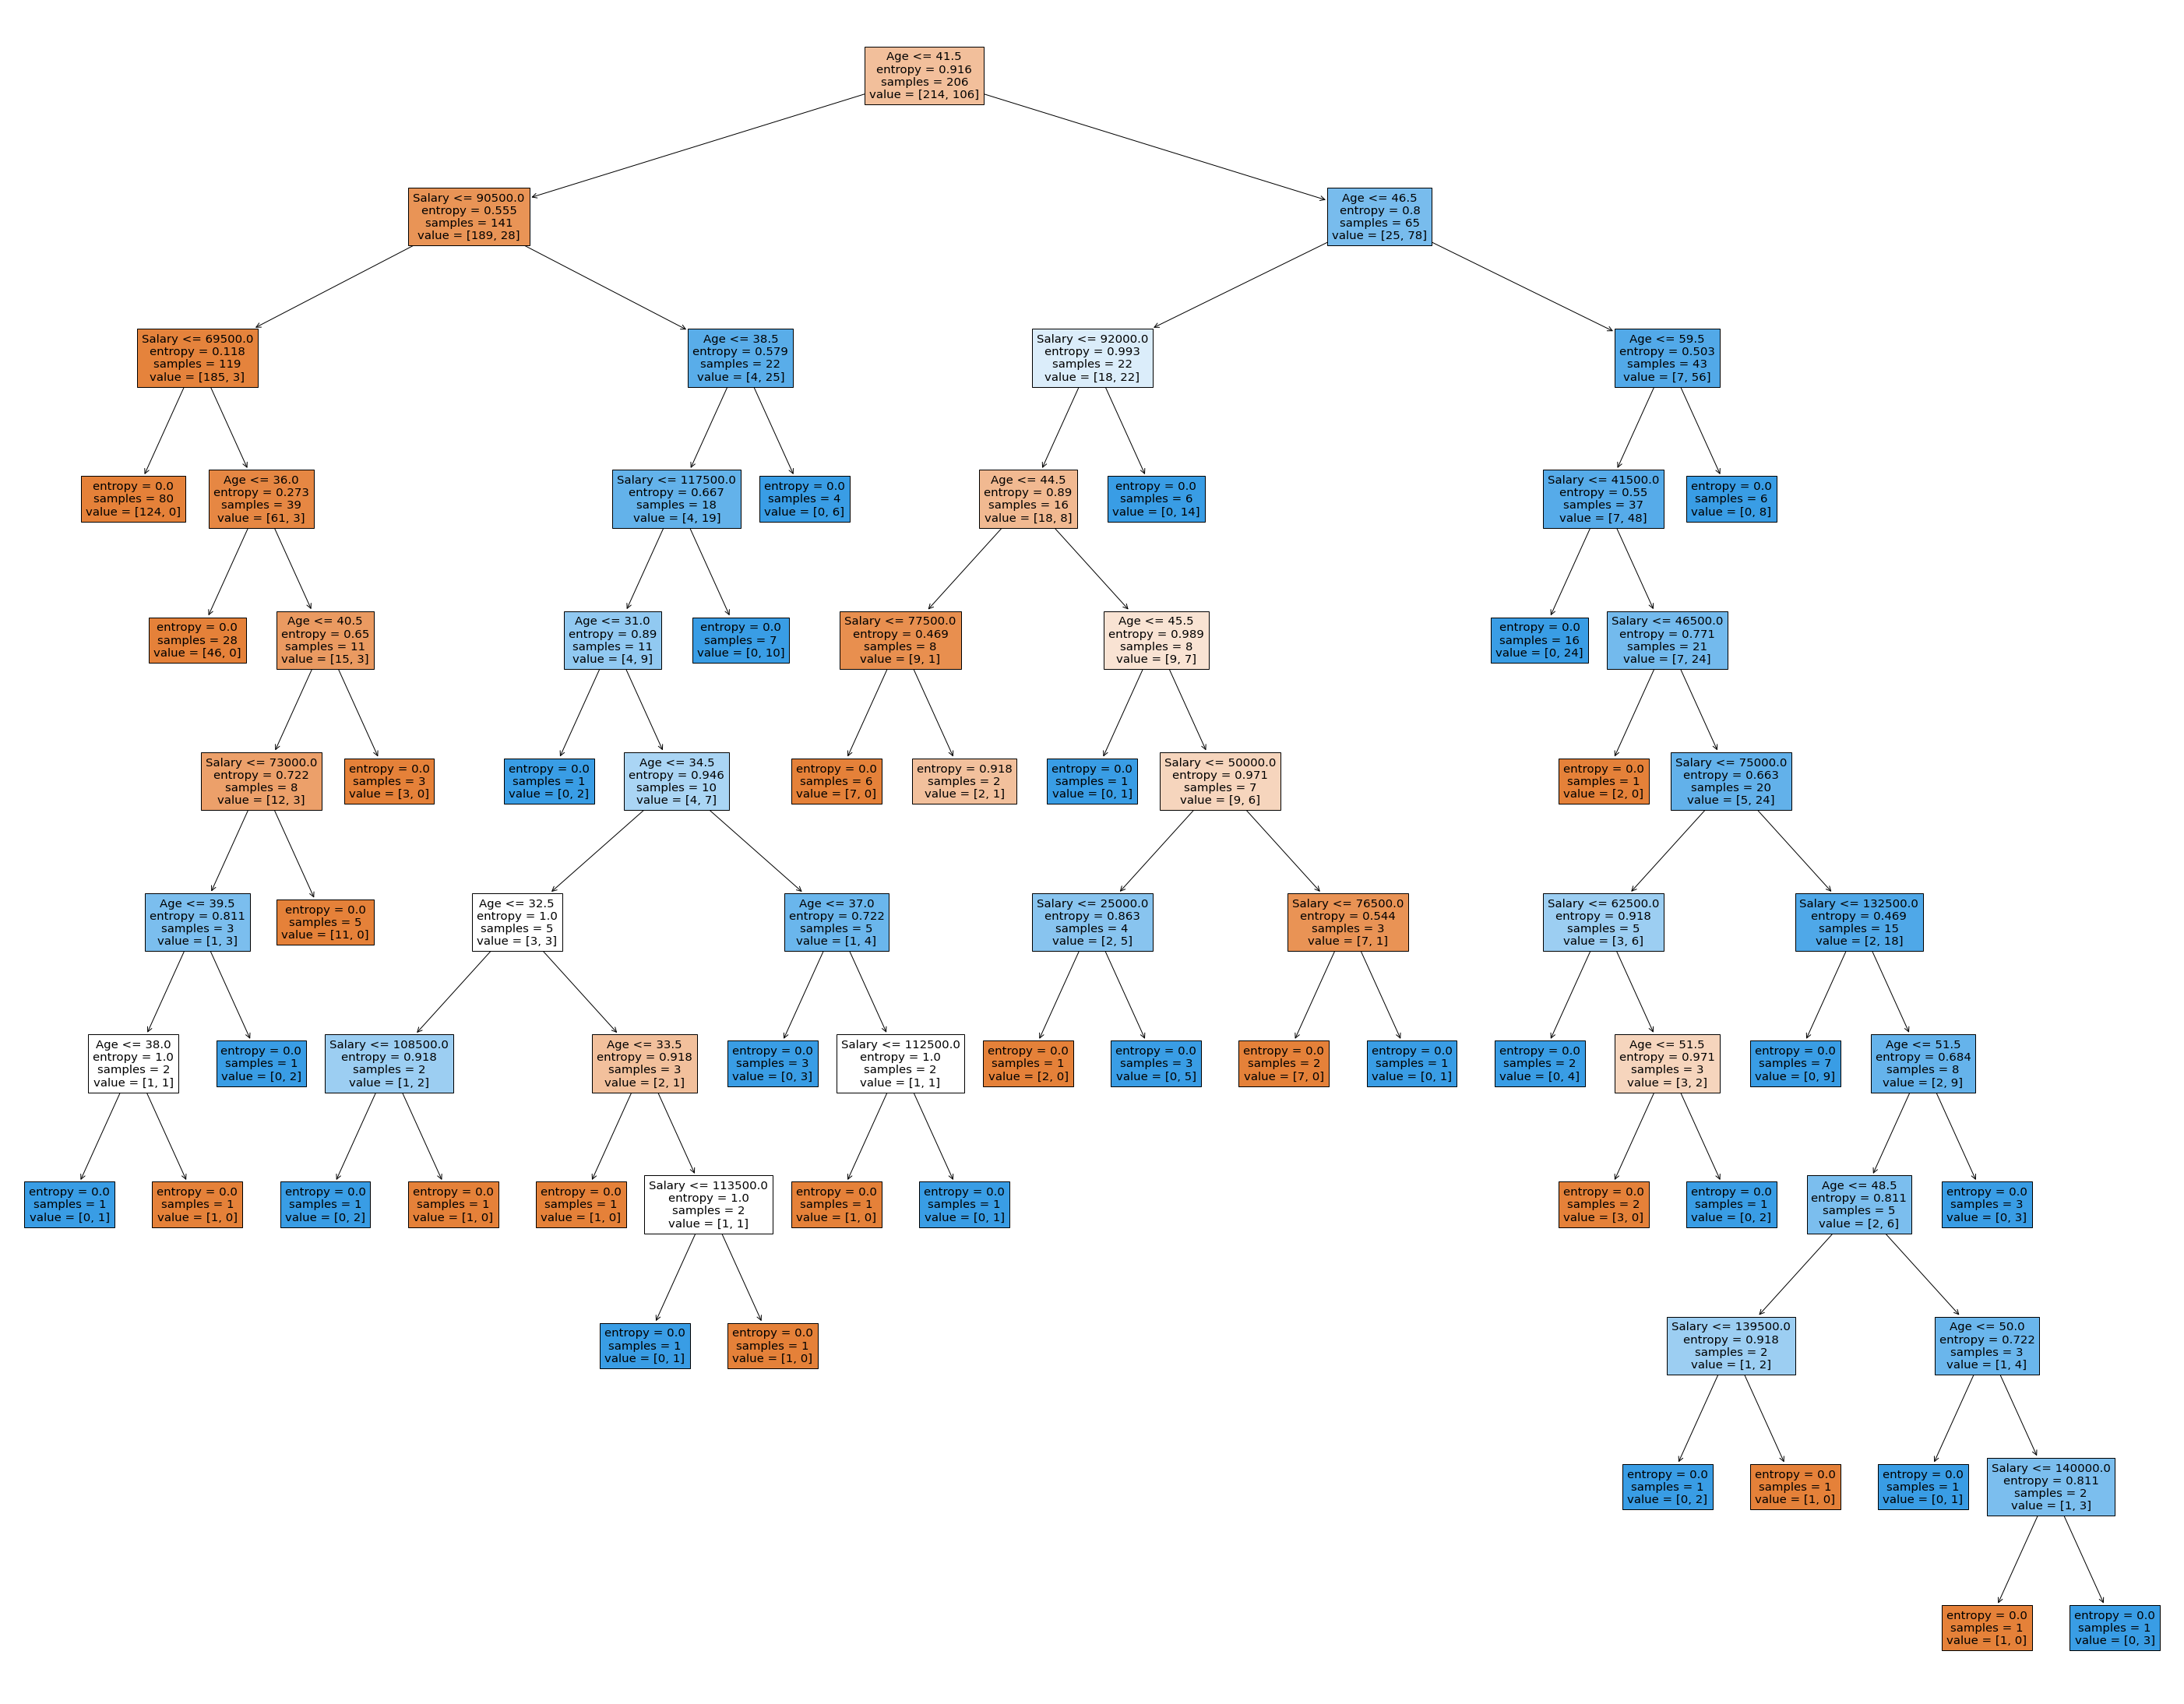

In [39]:
plt.figure(figsize=(50,40))
plot_tree(rf.estimators_[3],filled=True,feature_names=['Age','Salary'])
plt.show()

In [40]:
from mlxtend.plotting import plot_decision_regions

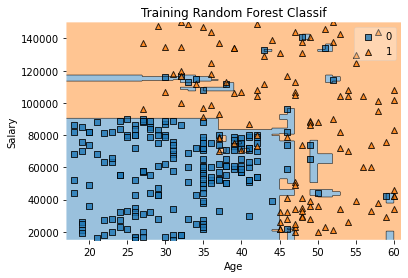

In [41]:
plot_decision_regions(x_train,y_train,clf=rf)
plt.title("Training Random Forest Classif")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

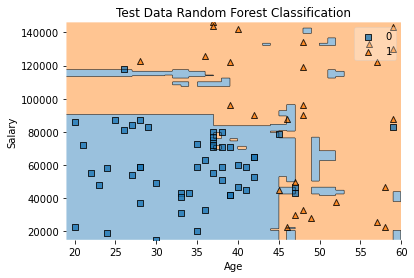

In [42]:
plot_decision_regions(x_test,y_test,clf=rf)
plt.title("Test Data Random Forest Classification")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()